## 1. Desicion Tree Model

In [34]:
# Import dependencies:
import pandas as pd
import sklearn as skl
from pathlib import Path
import numpy as np

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Read data:
df = pd.read_csv("clean_dataset.csv")
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [15]:
# Dataframe information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [3]:
# Find null values:
for column in df.columns:
    print(f"Column{column} has {df[column].isnull().sum()} null values")

ColumnGender has 0 null values
ColumnAge has 0 null values
ColumnDebt has 0 null values
ColumnMarried has 0 null values
ColumnBankCustomer has 0 null values
ColumnIndustry has 0 null values
ColumnEthnicity has 0 null values
ColumnYearsEmployed has 0 null values
ColumnPriorDefault has 0 null values
ColumnEmployed has 0 null values
ColumnCreditScore has 0 null values
ColumnDriversLicense has 0 null values
ColumnCitizen has 0 null values
ColumnZipCode has 0 null values
ColumnIncome has 0 null values
ColumnApproved has 0 null values


In [4]:
# Drop null rows:
df_cc = df.dropna()
df_cc

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [5]:
# Find duplicates using the duplicated().sum() method:
print(f"Duplicate entries:{df_cc.duplicated().sum()}")

Duplicate entries:0


In [6]:
df_cc.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [7]:
df_cc

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [17]:
# See the unique values for each of the categorical columns:
for i in df.columns:
    #print(i)
    if df[i].dtype==object:
        print(df[i].unique())

['Industrials' 'Materials' 'CommunicationServices' 'Transport'
 'InformationTechnology' 'Financials' 'Energy' 'Real Estate' 'Utilities'
 'ConsumerDiscretionary' 'Education' 'ConsumerStaples' 'Healthcare'
 'Research']
['White' 'Black' 'Asian' 'Latino' 'Other']
['ByBirth' 'ByOtherMeans' 'Temporary']


In [8]:
# Drop Citizen column:
df_cc.drop(columns=["Citizen"],inplace = True)
df_cc

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,280,750,0


In [9]:
# Drop Industry column:
df_cc.drop(columns=["Industry"],inplace = True)
df_cc

,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,White,1.25,1,1,1,0,202,0,1
1,0,58.67,4.460,1,1,Black,3.04,1,1,6,0,43,560,1
2,0,24.50,0.500,1,1,Black,1.50,1,0,0,0,280,824,1
3,1,27.83,1.540,1,1,White,3.75,1,1,5,1,100,3,1
4,1,20.17,5.625,1,1,White,1.71,1,0,0,0,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Black,1.25,0,0,0,0,260,0,0
686,0,22.67,0.750,1,1,White,2.00,0,1,2,1,200,394,0
687,0,25.25,13.500,0,0,Latino,2.00,0,1,1,1,200,1,0
688,1,17.92,0.205,1,1,White,0.04,0,0,0,0,280,750,0


In [10]:
# Transform String Columns(Ethnicity):
def change_string(ethnic):
    if ethnic=="White":
        return 1
    elif ethnic=="Black":
        return 2
    else:
        return 3
df_cc["Ethnicity"]= df_cc["Ethnicity"].apply(change_string)
df_cc

,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,1,1.25,1,1,1,0,202,0,1
1,0,58.67,4.460,1,1,2,3.04,1,1,6,0,43,560,1
2,0,24.50,0.500,1,1,2,1.50,1,0,0,0,280,824,1
3,1,27.83,1.540,1,1,1,3.75,1,1,5,1,100,3,1
4,1,20.17,5.625,1,1,1,1.71,1,0,0,0,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,2,1.25,0,0,0,0,260,0,0
686,0,22.67,0.750,1,1,1,2.00,0,1,2,1,200,394,0
687,0,25.25,13.500,0,0,3,2.00,0,1,1,1,200,1,0
688,1,17.92,0.205,1,1,1,0.04,0,0,0,0,280,750,0


In [19]:
# Transforn Income:
df_cc["Income"]=df_cc["Income"] / 2
df_cc.head()

,Gender,Age,Debt,Married,Bank_Customer,Ethnicity,Years_Employed,Prior_Default,Employed,Credit_Score,Drivers_License,Zip_Code,Income,Approved
0,1,30.83,0.000,1,1,1,1.25,1,1,1,0,202,0.00,1
1,0,58.67,4.460,1,1,2,3.04,1,1,6,0,43,140.00,1
2,0,24.50,0.500,1,1,2,1.50,1,0,0,0,280,206.00,1
3,1,27.83,1.540,1,1,1,3.75,1,1,5,1,100,0.75,1
4,1,20.17,5.625,1,1,1,1.71,1,0,0,0,120,0.00,1


In [20]:
# Reformat the names of the columns so they contain no spaces or numbers:
df_cc = df_cc.rename({'BankCustomer':'Bank_Customer', 'YearsEmployed':'Years_Employed', 'PriorDefault':'Prior_Default', 'PriorDefault':'Prior_Default', 'CreditScore':'Credit_Score','DriversLicense':'Drivers_License','ZipCode':'Zip_Code' }, axis='columns')
df_cc.head()

,Gender,Age,Debt,Married,Bank_Customer,Ethnicity,Years_Employed,Prior_Default,Employed,Credit_Score,Drivers_License,Zip_Code,Income,Approved
0,1,30.83,0.000,1,1,1,1.25,1,1,1,0,202,0.00,1
1,0,58.67,4.460,1,1,2,3.04,1,1,6,0,43,140.00,1
2,0,24.50,0.500,1,1,2,1.50,1,0,0,0,280,206.00,1
3,1,27.83,1.540,1,1,1,3.75,1,1,5,1,100,0.75,1
4,1,20.17,5.625,1,1,1,1.71,1,0,0,0,120,0.00,1


In [26]:
df_cc.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'Bank_Customer', 'Ethnicity',
       'Years_Employed', 'Prior_Default', 'Employed', 'Credit_Score',
       'Drivers_License', 'Zip_Code', 'Income', 'Approved'],
      dtype='object')

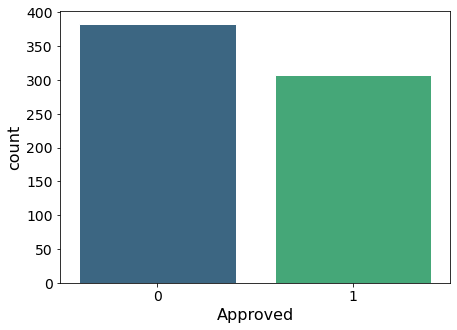

In [49]:
# Visualize the target variable and have a look at how many approved and declined applications:
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=df_cc, x='Approved',edgecolor="white",palette="viridis",order=df_cc["Approved"].value_counts().index)
total = df['Approved'].value_counts().sum()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Approved', fontsize=16)
plt.ylabel('count', fontsize=16)

plt.show()

In [35]:
# Define the features set:
X = df_cc.copy()
X = X.drop("Approved", axis=1)
X.head()

,Gender,Age,Debt,Married,Bank_Customer,Ethnicity,Years_Employed,Prior_Default,Employed,Credit_Score,Drivers_License,Zip_Code,Income
0,1,30.83,0.000,1,1,1,1.25,1,1,1,0,202,0.00
1,0,58.67,4.460,1,1,2,3.04,1,1,6,0,43,140.00
2,0,24.50,0.500,1,1,2,1.50,1,0,0,0,280,206.00
3,1,27.83,1.540,1,1,1,3.75,1,1,5,1,100,0.75
4,1,20.17,5.625,1,1,1,1.71,1,0,0,0,120,0.00


In [36]:
# Define the target set:
y = df_cc["Approved"].values
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Split the Data into Training and Testing Sets

In [37]:
# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [38]:
# Determine the shape of our training and testing sets:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(517, 13)
(173, 13)
(517,)
(173,)


In [39]:
# Split into Train and Test sets into an 80/20 split ( manually specify):
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)

In [40]:
# Determine the shape of our training and testing sets:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(552, 13)
(138, 13)
(552,)
(138,)


In [42]:
# Create a StandardScaler instance:
scaler = StandardScaler()
# Fit the Standard Scaler with the training data:
X_scaler = scaler.fit(X_train)

# Scale the data:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Fit the Decision Tree Model

In [44]:
# Create the decision tree classifier instance:
model = tree.DecisionTreeClassifier()
# Fit the model:
model = model.fit(X_train_scaled, y_train)

### Make Predictions Using the Testing Data

In [50]:
# Making predictions using the testing data:
predictions = model.predict(X_test_scaled)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

### Evaluate the Model

In [46]:
# Calculate the confusion matrix:
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix:
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,79,22
Actual 1,17,55


In [47]:
# Calculate the accuracy score:
acc_score = accuracy_score(y_test, predictions)

In [48]:
# Display results:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,79,22
Actual 1,17,55


Accuracy Score : 0.7745664739884393
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       101
           1       0.71      0.76      0.74        72

    accuracy                           0.77       173
   macro avg       0.77      0.77      0.77       173
weighted avg       0.78      0.77      0.78       173



The accuracy of Desicion Tree model is 0.7745664739884393

## 2. Random Forest Model

In [52]:
# Initial imports.
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Repeat  these steps from the previos Desicion Tree Model:
# Loading data.
# Preprocess the Data.
# Define the features set.
# Define the target set.
# Split into Train and Test sets.
# Create a StandardScaler instance.
# Fit the Standard Scaler with the training data.
# Scale the data.

### Fit the Random Forest Model

In [53]:
# Create a random forest classifier:
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [54]:
# Fit the model:
rf_model = rf_model.fit(X_train_scaled, y_train)

### Make Predictions Using the Testing Data

In [57]:
# Make  predictions using the testing data:
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

### Evaluate the Model

In [58]:
# Calculating the confusion matrix:
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix:
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,91,10
Actual 1,10,62


In [61]:
# Calculate the accuracy score:
acc_score2 = accuracy_score(y_test, predictions)
acc_score2

0.884393063583815

In [62]:
# Display results:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score2}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,91,10
Actual 1,10,62


Accuracy Score : 0.884393063583815
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       101
           1       0.86      0.86      0.86        72

    accuracy                           0.88       173
   macro avg       0.88      0.88      0.88       173
weighted avg       0.88      0.88      0.88       173



The accuracy of Random Forest model is 0.884393063583815